# Managing Time Series Data With Pandas
* From udemy course: The Complete Pandas Bootcamp 2025: Data Science with Python
* https://www.udemy.com/course/the-pandas-bootcamp/learn/lecture/13343844#overview

## Time Series Basics

* [pd.to_dateime()](#scrollTo=wwJgU7cYI7Vm&line=1&uniqifier=1)
* [Timestamp Date Parts (Components)](#scrollTo=mx0mA5ZLCHa8&line=1&uniqifier=1)
* [String/Timestamp Conversion](#scrollTo=vL5klTtYSG3i&line=1&uniqifier=1)
* [Setting Timezones](#scrollTo=-x42cRNyeG3I)
* [Timedeltas](#scrollTo=LuKP6ejUlgaG&line=1&uniqifier=1)
* [Indexing and Slicing](#scrollTo=ya_Lap846I_p&line=1&uniqifier=1)
* [pd.date_range()](#scrollTo=8W7Cqbkt6I_q&line=1&uniqifier=1)
* [resample()]()
* [Period Index]()





### Importing Time Series Data from csv-Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab/Datasets/time_series_sample.csv'
# path = 'data/time_series_sample.csv' # USE THIS PATH LOCALLY

temp = pd.read_csv(path)

In [ ]:
# path = '/content/drive/MyDrive/Colab/Datasets/time_series_sample.csv'
# temp = pd.read_csv(path, parse_dates=["datetime"], index_col= "datetime")

In [ ]:
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


### Converting strings to datetime objects with pd.to_datetime()

In [ ]:
temp['datetime'] = pd.to_datetime(temp['datetime'])

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   LA        35062 non-null  float64       
 2   NY        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 821.9 KB


In [ ]:
# move datetime column to index
temp_index = temp.set_index(pd.to_datetime(temp['datetime'])).drop("datetime", axis = 1)

In [ ]:
temp_index.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


## pd.to_datetime()
* Provides a flexible methods to convert several date/timestamp strings to a pandas Timestamp object
* Enables creation of timestamps from a variety of string formats, automatically

In [ ]:
# creates Timestamp object
pd.to_datetime("20150520")

Timestamp('2015-05-20 00:00:00')

In [ ]:
 # can also use pd.Timestamp, but this doesn't have the intricate parsing logic
pd.Timestamp("2015-05-20")
pd.Timestamp(year=2024, month=4, day=29)

Timestamp('2024-04-29 00:00:00')

In [ ]:
datetime.datetime(2024, 4, 29)

datetime.datetime(2024, 4, 29, 0, 0)

## Use the `format` parameter of `pd.to_datetime()` to specify the format of the string
* Provide the format of the string so that is does not need to be inferred for each row via `pd.to_datetime()` which can be computationally inefficient
* format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
# flexibly parses strings and converts them to Timestamp objects
print(pd.to_datetime("2015-05-20 10:30:20"))
print(pd.to_datetime("2015-05-20 10:30:20", format="%Y-%m-%d %H:%M:%S"))
print(pd.to_datetime("20150520"))
print(pd.to_datetime("20150520", format="%Y%m%d"))
print(pd.to_datetime("2015/05/20"))
print(pd.to_datetime("2015/05/20", format="%Y/%m/%d"))
print(pd.to_datetime("2015 05 20"))
print(pd.to_datetime("2015 05 20", format="%Y %m %d"))
print(pd.to_datetime("05/20/15"))
print(pd.to_datetime("05/20/15", format="%m/%d/%y"))
print(pd.to_datetime("05/20/2015"))
print(pd.to_datetime("05/20/2015", format="%m/%d/%Y"))
print(pd.to_datetime("2015 May 20"))
print(pd.to_datetime("2015 May 20", format="%Y %B %d"))
print(pd.to_datetime("May 2015 20"))
print(pd.to_datetime("May 2015 20", format="%B %Y %d"))
print(pd.to_datetime("2015 20th may"))
print(pd.to_datetime("2015 20th may", format="%Y %dth %B"))
print(pd.to_datetime("May 20, 2015"))
print(pd.to_datetime("May 20, 2015", format="%b %d, %Y"))
print(pd.to_datetime("May 2015"))
print(pd.to_datetime("May 2015", format="%b %Y"))
print(pd.to_datetime("05-2015"))
print(pd.to_datetime("05-2015", format="%m-%Y"))

2015-05-20 10:30:20
2015-05-20 10:30:20
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-20 00:00:00
2015-05-01 00:00:00
2015-05-01 00:00:00
2015-05-01 00:00:00
2015-05-01 00:00:00


In [ ]:
# handles mixed formats
pd.to_datetime(["2015-05-20", "Feb 20 2015"], format = "mixed") # new

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], format = "mixed", errors="coerce") # new

DatetimeIndex(['2015-05-20', '2015-02-20', 'NaT'], dtype='datetime64[ns]', freq=None)

## Timestamp Date Part (Components)

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2015', '2016', '2017', '2018']

dates = [random.choice(months) + "-" + random.choice(years) for i in range(10000)]

In [ ]:
df_dates = pd.DataFrame(dates, columns = ["date"])
df_dates.head()

,date
0,Jun-2016
1,Aug-2015
2,May-2016
3,May-2018
4,Dec-2017


In [ ]:
df_dates['date_datetime'] = pd.to_datetime(df_dates['date'], format="%b-%Y")
df_dates.head()

,date,date_datetime
0,Jun-2016,2016-06-01
1,Aug-2015,2015-08-01
2,May-2016,2016-05-01
3,May-2018,2018-05-01
4,Dec-2017,2017-12-01


In [ ]:
df_dates['day'] = df_dates['date_datetime'].dt.day
df_dates['dayofweek'] = df_dates['date_datetime'].dt.dayofweek
df_dates['day_name'] = df_dates['date_datetime'].dt.day_name()
df_dates['month'] = df_dates['date_datetime'].dt.month
df_dates['month_name'] = df_dates['date_datetime'].dt.month_name()
df_dates['days_in_month'] = df_dates['date_datetime'].dt.days_in_month
df_dates['quarter'] = df_dates['date_datetime'].dt.quarter
df_dates['week'] = df_dates['date_datetime'].dt.isocalendar().week
df_dates['year'] = df_dates['date_datetime'].dt.year
df_dates['today'] = pd.Timestamp.today().normalize()
df_dates['days_since_event'] = (df_dates['today'] - df_dates['date_datetime']).dt.days
df_dates['months_since_event'] = (df_dates['days_since_event'] / 30.44).astype(int)
df_dates['month_day'] = df_dates['date_datetime'].dt.strftime("%B %d")

df_dates.head()

,date,date_datetime,day,dayofweek,day_name,month,month_name,days_in_month,quarter,week,year,today,days_since_event,months_since_event,month_day
0,Jun-2016,2016-06-01,1,2,Wednesday,6,June,30,2,22,2016,2025-08-11,3358,110,June 01
1,Aug-2015,2015-08-01,1,5,Saturday,8,August,31,3,31,2015,2025-08-11,3663,120,August 01
2,May-2016,2016-05-01,1,6,Sunday,5,May,31,2,17,2016,2025-08-11,3389,111,May 01
3,May-2018,2018-05-01,1,1,Tuesday,5,May,31,2,18,2018,2025-08-11,2659,87,May 01
4,Dec-2017,2017-12-01,1,4,Friday,12,December,31,4,48,2017,2025-08-11,2810,92,December 01


### NOTE: `.dt.normalize()` sets the time to midnight (00:00:00), effectively trimming it visually to 'YYYY-MM-DD'

In [ ]:
temp['date'] = temp['datetime'].dt.normalize() # .dt.normalize() sets the time to midnight (00:00:00), effectively trimming it visually to 'YYYY-MM-DD'
temp['dayofweek'] = temp['datetime'].dt.dayofweek
temp['day_name'] = temp['datetime'].dt.day_name()
temp['month'] = temp['datetime'].dt.month
temp['month_name'] = temp['datetime'].dt.month_name()
temp['days_in_month'] = temp['datetime'].dt.days_in_month
temp['quarter'] = temp['datetime'].dt.quarter
temp['week'] = temp['datetime'].dt.isocalendar().week
temp['year'] = temp['datetime'].dt.year
temp['today'] = pd.Timestamp.today().normalize()
temp['days_since_event'] = (temp['today'] - temp['datetime']).dt.days
temp['months_since_event'] = (temp['days_since_event'] / 30.44).astype(int)
temp['month_day'] = temp['datetime'].dt.strftime("%B %d")

temp.head()

,datetime,LA,NY,date,dayofweek,day_name,month,month_name,days_in_month,quarter,week,year,today,days_since_event,months_since_event,month_day
0,2013-01-01 00:00:00,11.7,-1.1,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4605,151,January 01
1,2013-01-01 01:00:00,10.7,-1.7,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01
2,2013-01-01 02:00:00,9.9,-2.0,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01
3,2013-01-01 03:00:00,9.3,-2.1,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01
4,2013-01-01 04:00:00,8.8,-2.3,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01


## String/Timestamp Conversion
* strftime() — Convert Date → String
* strptime() — Convert String → Date
  * `df['string_column'] = "2015-05-20 10:30:20"`
  * `df['datetime'] = pd.to_datetime(df['string_column'], format="%Y-%m-%d %H:%M:%S")`

In [ ]:
# strftime() — Convert Date → String
from datetime import datetime

dt = datetime(2025, 4, 29, 14, 30)

# Format it as a string
print(dt.strftime("%Y-%m-%d %H:%M"))
print(dt.strftime("%b-%Y"))

2025-04-29 14:30
Apr-2025


In [ ]:
# strptime() — Convert String → Date
# pandas implementation
print(pd.to_datetime("2015-05-20 10:30:20", format="%Y-%m-%d %H:%M:%S"))
# df['datetime'] = pd.to_datetime(df['string_column'], format="%Y-%m-%d %H:%M:%S")



from datetime import datetime

date_str = "2025-04-29 14:30"

# Parse the string using same format
dt_parsed = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
dt_parsed  # datetime.datetime(2025, 4, 29, 14, 30)

2015-05-20 10:30:20


datetime.datetime(2025, 4, 29, 14, 30)

## Setting Timezone and Timezone Conversion

In [ ]:
import pytz

# pytz.country_timezones('US')
print(len(pytz.country_timezones('US')))
print(len(pytz.all_timezones))
pytz.all_timezones[:20]

29
597


['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti']

In [ ]:
temp['datetime_utc'] = temp['datetime'].dt.tz_localize("UTC")
temp.head()

,datetime,LA,NY,date,dayofweek,day_name,month,month_name,days_in_month,quarter,week,year,today,days_since_event,months_since_event,month_day,datetime_utc
0,2013-01-01 00:00:00,11.7,-1.1,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4605,151,January 01,2013-01-01 00:00:00+00:00
1,2013-01-01 01:00:00,10.7,-1.7,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01,2013-01-01 01:00:00+00:00
2,2013-01-01 02:00:00,9.9,-2.0,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01,2013-01-01 02:00:00+00:00
3,2013-01-01 03:00:00,9.3,-2.1,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01,2013-01-01 03:00:00+00:00
4,2013-01-01 04:00:00,8.8,-2.3,2013-01-01,1,Tuesday,1,January,31,1,1,2013,2025-08-11,4604,151,January 01,2013-01-01 04:00:00+00:00


In [ ]:
temp['datetime_utc'].dt.tz

datetime.timezone.utc

In [ ]:
test_timestamp = pd.Timestamp('2015-01-01 08:00', tz='America/Denver')
test_timestamp

Timestamp('2015-01-01 08:00:00-0700', tz='America/Denver')

In [ ]:
test_timestamp.tz_convert('America/Los_Angeles')

Timestamp('2015-01-01 07:00:00-0800', tz='America/Los_Angeles')

## Timedeltas

In [ ]:
print(pd.Timedelta(1, "d"))
print(pd.Timedelta('2 days 2 hours 15 minutes 30 seconds'))
print(pd.Timedelta(6, unit='h'))
print(pd.Timedelta(days=2, hours=10, minutes=30, seconds=10))
print(pd.Timedelta(days=-30))

1 days 00:00:00
2 days 02:15:30
0 days 06:00:00
2 days 10:30:10
-30 days +00:00:00


In [ ]:
print(pd.Timedelta(days=2, hours=10, minutes=30, seconds=10).days)
print(pd.Timedelta(days=2, hours=10, minutes=30, seconds=10).seconds)

2
37810


### Arithmetic Operations

In [ ]:
pd.Timestamp('2015-01-01 08:00') + pd.Timedelta(days=30)

Timestamp('2015-01-31 08:00:00')

In [ ]:
pd.Timedelta(days=30) + pd.Timedelta(days=30)

Timedelta('60 days 00:00:00')

In [ ]:
pd.Timestamp('2015-01-31 08:00') - pd.Timestamp('2015-01-01 08:00')

Timedelta('30 days 00:00:00')

In [ ]:
(pd.Timestamp('2015-01-31 08:00') - pd.Timestamp('2015-01-01 08:00')).days

30

### Series and Dataframe Operations

In [ ]:
df_dates['date_datetime_prior30'] = df_dates['date_datetime'] - pd.Timedelta(days=30)
df_dates.head()

,date,date_datetime,day,dayofweek,day_name,month,month_name,days_in_month,quarter,week,year,today,days_since_event,months_since_event,month_day,date_datetime_prior30
0,Jun-2016,2016-06-01,1,2,Wednesday,6,June,30,2,22,2016,2025-08-11,3358,110,June 01,2016-05-02
1,Aug-2015,2015-08-01,1,5,Saturday,8,August,31,3,31,2015,2025-08-11,3663,120,August 01,2015-07-02
2,May-2016,2016-05-01,1,6,Sunday,5,May,31,2,17,2016,2025-08-11,3389,111,May 01,2016-04-01
3,May-2018,2018-05-01,1,1,Tuesday,5,May,31,2,18,2018,2025-08-11,2659,87,May 01,2018-04-01
4,Dec-2017,2017-12-01,1,4,Friday,12,December,31,4,48,2017,2025-08-11,2810,92,December 01,2017-11-01


## Indexing and Slicing Time Series

In [ ]:
temp_index.loc["2013-01-01 01:00:00"]

,2013-01-01 01:00:00
LA,10.7
NY,-1.7


In [ ]:
temp_index.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [ ]:
temp_index.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [ ]:
temp_index.loc["2015-05-20"].shape

(24, 2)

In [ ]:
temp_index.loc["2015-05-20 10:00:00"]

,2015-05-20 10:00:00
LA,7.8
NY,13.3


In [ ]:
temp_index.loc["2015-01-01" : "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [ ]:
temp_index.loc["2015-01-01" : "2015-12-31"].equals(temp_index.loc["2015"])

True

In [ ]:
temp_index.loc["2015-04-15" : "2016-02-23"]

,LA,NY
datetime,,
2015-04-15 00:00:00,19.1,12.8
2015-04-15 01:00:00,20.0,12.0
2015-04-15 02:00:00,17.7,11.3
2015-04-15 03:00:00,15.5,11.2
2015-04-15 04:00:00,13.3,10.4
...,...,...
2016-02-23 19:00:00,23.4,2.6
2016-02-23 20:00:00,23.4,2.2
2016-02-23 21:00:00,26.8,2.2


In [ ]:
temp_index.loc["2015-05-20":]

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [ ]:
temp_index.loc[:"2015-05-20"]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2015-05-20 19:00:00,17.7,18.1
2015-05-20 20:00:00,18.4,17.8
2015-05-20 21:00:00,18.0,17.8


In [ ]:
temp_index.loc["20FEBRUARY2015"]

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5
2015-02-20 05:00:00,8.9,-15.9
2015-02-20 06:00:00,9.0,-15.9
2015-02-20 07:00:00,7.1,-15.9
2015-02-20 08:00:00,6.6,-16.8


In [ ]:
temp_index.loc[["2015-05-20 10:00:00", "2015-05-20 12:00:00"]] # now works

,LA,NY
datetime,,
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6


In [ ]:
two_timestamps = pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
two_timestamps

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
temp_index.loc[two_timestamps]

,LA,NY
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6


## Creating a customized DatetimeIndex with pd.date_range()

In [ ]:
import pandas as pd

In [ ]:
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq= "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(start = "2015-07-01", periods = 31, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end = "2015-07-31", periods = 31, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq = "B")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range(start = "2015-07-31", periods = 10, freq = "h") # use h instead of H

DatetimeIndex(['2015-07-31 00:00:00', '2015-07-31 01:00:00',
               '2015-07-31 02:00:00', '2015-07-31 03:00:00',
               '2015-07-31 04:00:00', '2015-07-31 05:00:00',
               '2015-07-31 06:00:00', '2015-07-31 07:00:00',
               '2015-07-31 08:00:00', '2015-07-31 09:00:00'],
              dtype='datetime64[ns]', freq='h')

In [ ]:
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W")

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26',
               '2015-08-02', '2015-08-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W-Wed")

DatetimeIndex(['2015-07-01', '2015-07-08', '2015-07-15', '2015-07-22',
               '2015-07-29', '2015-08-05'],
              dtype='datetime64[ns]', freq='W-WED')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "ME") # use ME instead of M

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "MS")

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = pd.DateOffset(months = 1))

DatetimeIndex(['2015-07-14', '2015-08-14', '2015-09-14', '2015-10-14',
               '2015-11-14', '2015-12-14'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QE") # use QE instead of Q

DatetimeIndex(['2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30',
               '2016-09-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS")

DatetimeIndex(['2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
               '2016-10-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS-MAY") # use QS-MAY instead of QS-May

DatetimeIndex(['2015-08-01', '2015-11-01', '2016-02-01', '2016-05-01',
               '2016-08-01', '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-MAY')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YE") # use YE instead of A

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YS") # use YS instead of AS

DatetimeIndex(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [ ]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "YS-JUL") # use YS-JUL instead of AS-Jul

DatetimeIndex(['2016-07-01', '2017-07-01', '2018-07-01', '2019-07-01',
               '2020-07-01', '2021-07-01'],
              dtype='datetime64[ns]', freq='YS-JUL')

In [ ]:
pd.date_range(end = "2018-11-24", periods = 10,  freq = pd.DateOffset(years = 1))

DatetimeIndex(['2009-11-24', '2010-11-24', '2011-11-24', '2012-11-24',
               '2013-11-24', '2014-11-24', '2015-11-24', '2016-11-24',
               '2017-11-24', '2018-11-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### More on pd.date_range()

In [ ]:
import pandas as pd

In [ ]:
pd.date_range(start = "2015-07-01", periods = 10, freq = "3d8h") # use h instead of H

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-04 08:00:00',
               '2015-07-07 16:00:00', '2015-07-11 00:00:00',
               '2015-07-14 08:00:00', '2015-07-17 16:00:00',
               '2015-07-21 00:00:00', '2015-07-24 08:00:00',
               '2015-07-27 16:00:00', '2015-07-31 00:00:00'],
              dtype='datetime64[ns]', freq='80h')

### Downsampling Time Series with resample() (Part 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
# temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")
path = '/content/drive/MyDrive/Colab/Datasets/time_series_sample.csv'
temp = pd.read_csv(path, parse_dates=["datetime"], index_col= "datetime")

In [ ]:
temp.resample("D")

In [ ]:
list(temp.resample("D"))[1][1]

,LA,NY
datetime,,
2013-01-02 00:00:00,13.2,2.6
2013-01-02 01:00:00,11.8,2.7
2013-01-02 02:00:00,10.5,2.9
2013-01-02 03:00:00,9.5,2.9
2013-01-02 04:00:00,8.3,2.9
2013-01-02 05:00:00,8.0,3.5
2013-01-02 06:00:00,7.5,3.7
2013-01-02 07:00:00,7.1,3.5
2013-01-02 08:00:00,6.4,3.7


In [ ]:
temp.head(25)

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 05:00:00,8.7,-2.5
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 07:00:00,7.8,-3.4
2013-01-01 08:00:00,6.7,-3.0


In [ ]:
temp.resample("D").sum()

,LA,NY
datetime,,
2013-01-01,212.6,-9.7
2013-01-02,222.8,77.0
2013-01-03,247.3,-58.2
2013-01-04,276.3,-49.7
2013-01-05,266.0,19.6
...,...,...
2016-12-27,291.7,253.9
2016-12-28,346.4,96.4
2016-12-29,385.1,31.5


In [ ]:
temp.resample("2h").last() # use h instead of H

,LA,NY
datetime,,
2013-01-01 00:00:00,10.7,-1.7
2013-01-01 02:00:00,9.3,-2.1
2013-01-01 04:00:00,8.7,-2.5
2013-01-01 06:00:00,7.8,-3.4
2013-01-01 08:00:00,6.6,-1.8
...,...,...
2016-12-31 14:00:00,13.0,-0.6
2016-12-31 16:00:00,12.9,1.9
2016-12-31 18:00:00,13.5,4.6


In [ ]:
temp.resample("W").mean()

,LA,NY
datetime,,
2013-01-06,10.214583,0.222917
2013-01-13,10.494048,4.245238
2013-01-20,11.119643,3.924405
2013-01-27,15.586905,-4.660714
2013-02-03,11.569643,1.502381
...,...,...
2016-12-04,12.975595,8.024405
2016-12-11,13.738095,1.922619
2016-12-18,13.466667,0.052381


In [ ]:
temp.resample("W-Wed").mean()

,LA,NY
datetime,,
2013-01-02,9.070833,1.402083
2013-01-09,11.033333,1.033929
2013-01-16,8.870238,6.001190
2013-01-23,14.678571,1.010714
2013-01-30,12.554762,-4.382738
...,...,...
2016-12-07,13.205357,5.964286
2016-12-14,14.490476,1.228571
2016-12-21,13.209524,-2.248810


In [ ]:
temp.resample("ME").mean() # use ME instead of M

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328
2013-06-30,19.905417,22.225694
2013-07-31,22.093952,26.329704
2013-08-31,21.513172,22.480376
2013-09-30,22.404861,18.291806


In [ ]:
temp.resample("MS").mean()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
2013-06-01,19.905417,22.225694
2013-07-01,22.093952,26.329704
2013-08-01,21.513172,22.480376
2013-09-01,22.404861,18.291806


In [ ]:
# temp.resample("MS", loffset="14D").mean() # old

In [ ]:
# new (Alt 1)
temp.resample("MS").mean().shift(14, freq="D")

,LA,NY
datetime,,
2013-01-15,11.596237,1.129570
2013-02-15,12.587202,0.617857
2013-03-15,15.069946,3.719220
2013-04-15,16.487361,10.699306
2013-05-15,19.005780,15.824328
2013-06-15,19.905417,22.225694
2013-07-15,22.093952,26.329704
2013-08-15,21.513172,22.480376
2013-09-15,22.404861,18.291806


In [ ]:
# new (Alt 2)
from pandas.tseries.frequencies import to_offset
df2 = temp.resample("MS").mean()
df2.index = df2.index + to_offset("14D")
df2

,LA,NY
datetime,,
2013-01-15,11.596237,1.129570
2013-02-15,12.587202,0.617857
2013-03-15,15.069946,3.719220
2013-04-15,16.487361,10.699306
2013-05-15,19.005780,15.824328
2013-06-15,19.905417,22.225694
2013-07-15,22.093952,26.329704
2013-08-15,21.513172,22.480376
2013-09-15,22.404861,18.291806


In [ ]:
temp.resample("QE").mean() # use QE instead of Q

,LA,NY
datetime,,
2013-03-31,13.099212,1.862361
2013-06-30,18.472115,16.245101
2013-09-30,21.999638,22.411594
2013-12-31,15.047781,8.084918
2014-03-31,15.508287,-0.570880
2014-06-30,18.891255,16.253938
2014-09-30,22.281295,21.738315
2014-12-31,12.281748,7.855933
2015-03-31,11.869306,-3.340509


In [ ]:
temp.resample("QE-FEB").mean() # use QE-FEB instead of QE-Feb

,LA,NY
datetime,,
2013-02-28,12.066525,0.886723
2013-05-31,16.859973,10.074230
2013-08-31,21.184601,23.694384
2013-11-30,18.028755,13.258288
2014-02-28,14.675000,-0.301713
2014-05-31,17.562047,9.645652
2014-08-31,21.691168,22.559284
2014-11-30,16.640522,13.097070
2015-02-28,9.822593,-2.481574


In [ ]:
temp.resample("YE").mean() # use YE instead of A

,LA,NY
datetime,,
2013-12-31,17.174229,12.196153
2014-12-31,17.245616,11.370959
2015-12-31,17.191530,11.795194
2016-12-31,18.330305,12.908470


In [ ]:
temp.resample("YS").mean() # use YS instead of AS

,LA,NY
datetime,,
2013-01-01,17.174229,12.196153
2014-01-01,17.245616,11.370959
2015-01-01,17.191530,11.795194
2016-01-01,18.330305,12.908470


### Downsampling and the PeriodIndex

In [ ]:
temp

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [ ]:
temp.resample("ME", kind = "timestamp").mean()

/tmp/ipython-input-4142101723.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp.resample("ME", kind = "timestamp").mean()


,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328
2013-06-30,19.905417,22.225694
2013-07-31,22.093952,26.329704
2013-08-31,21.513172,22.480376
2013-09-30,22.404861,18.291806


In [ ]:
# old
temp.resample("ME", kind = "period").mean()

/tmp/ipython-input-1675499071.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp.resample("ME", kind = "period").mean()


,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [ ]:
# new
temp2 = temp.resample("ME").mean()
temp2.index = temp2.index.to_period('M')
temp2

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [ ]:
# old
temp.resample("W", kind = "period").mean()

/tmp/ipython-input-3925663784.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp.resample("W", kind = "period").mean()


,LA,NY
datetime,,
2012-12-31/2013-01-06,10.214583,0.222917
2013-01-07/2013-01-13,10.494048,4.245238
2013-01-14/2013-01-20,11.119643,3.924405
2013-01-21/2013-01-27,15.586905,-4.660714
2013-01-28/2013-02-03,11.569643,1.502381
...,...,...
2016-11-28/2016-12-04,12.975595,8.024405
2016-12-05/2016-12-11,13.738095,1.922619
2016-12-12/2016-12-18,13.466667,0.052381


In [ ]:
# new
temp3 = temp.resample("W").mean()
temp3.index = temp3.index.to_period('W')
temp3

,LA,NY
datetime,,
2012-12-31/2013-01-06,10.214583,0.222917
2013-01-07/2013-01-13,10.494048,4.245238
2013-01-14/2013-01-20,11.119643,3.924405
2013-01-21/2013-01-27,15.586905,-4.660714
2013-01-28/2013-02-03,11.569643,1.502381
...,...,...
2016-11-28/2016-12-04,12.975595,8.024405
2016-12-05/2016-12-11,13.738095,1.922619
2016-12-12/2016-12-18,13.466667,0.052381


In [ ]:
# old
temp.resample("Q", kind = "period").mean()

/tmp/ipython-input-3930916638.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp.resample("Q", kind = "period").mean()
/tmp/ipython-input-3930916638.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  temp.resample("Q", kind = "period").mean()


,LA,NY
datetime,,
2013Q1,13.099212,1.862361
2013Q2,18.472115,16.245101
2013Q3,21.999638,22.411594
2013Q4,15.047781,8.084918
2014Q1,15.508287,-0.570880
2014Q2,18.891255,16.253938
2014Q3,22.281295,21.738315
2014Q4,12.281748,7.855933
2015Q1,11.869306,-3.340509


In [ ]:
# new
temp4 = temp.resample("QE").mean()
temp4.index = temp4.index.to_period('Q')
temp4

,LA,NY
datetime,,
2013Q1,13.099212,1.862361
2013Q2,18.472115,16.245101
2013Q3,21.999638,22.411594
2013Q4,15.047781,8.084918
2014Q1,15.508287,-0.570880
2014Q2,18.891255,16.253938
2014Q3,22.281295,21.738315
2014Q4,12.281748,7.855933
2015Q1,11.869306,-3.340509


In [ ]:
 # old
temp.resample("A", kind = "period").mean()

/tmp/ipython-input-3165205368.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp.resample("A", kind = "period").mean()
/tmp/ipython-input-3165205368.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  temp.resample("A", kind = "period").mean()


,LA,NY
datetime,,
2013,17.174229,12.196153
2014,17.245616,11.370959
2015,17.191530,11.795194
2016,18.330305,12.908470


In [ ]:
# new
temp5 = temp.resample("YE").mean()
temp5.index = temp5.index.to_period('Y')
temp5

,LA,NY
datetime,,
2013,17.174229,12.196153
2014,17.245616,11.370959
2015,17.191530,11.795194
2016,18.330305,12.908470


In [ ]:
# old
temp_m = temp.resample("M", kind = "period").mean()
temp_m

/tmp/ipython-input-1616624422.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  temp_m = temp.resample("M", kind = "period").mean()
/tmp/ipython-input-1616624422.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_m = temp.resample("M", kind = "period").mean()


,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [ ]:
# new
temp_m = temp.resample("ME").mean()
temp_m.index = temp_m.index.to_period('M')
temp_m

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [ ]:
temp_m.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
temp_m.index#[0]

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='datetime')

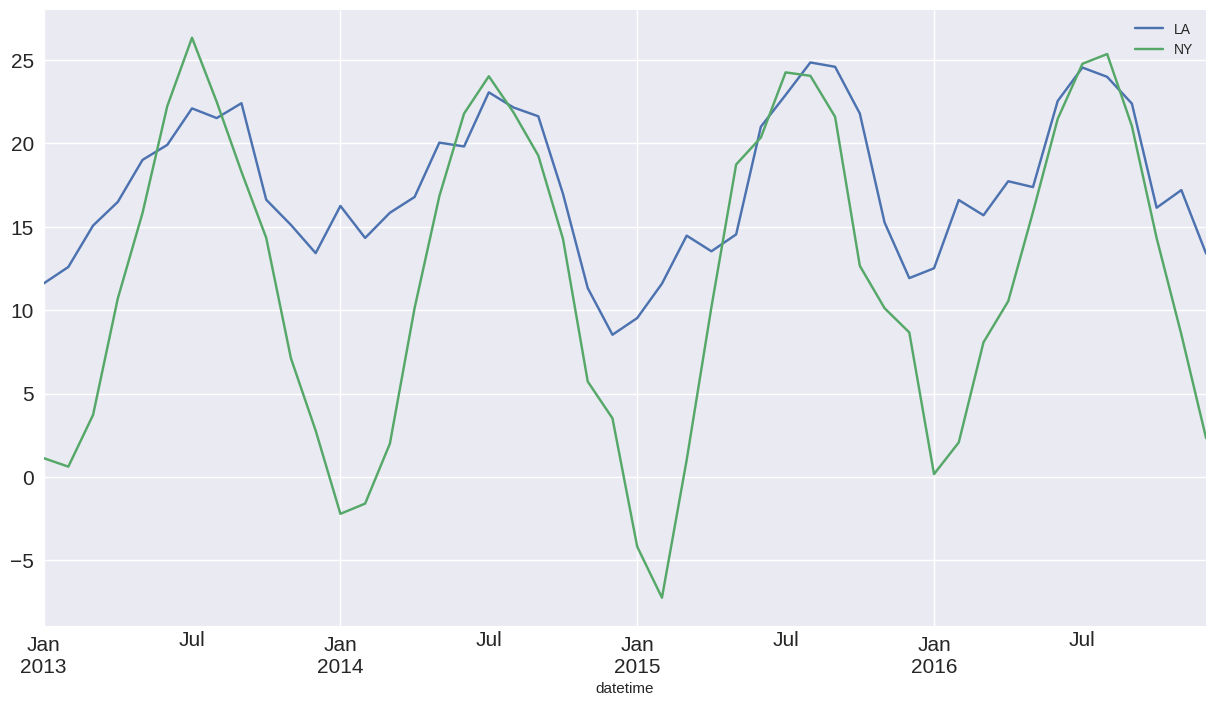

In [ ]:
temp_m.plot(figsize = (15, 8), fontsize = 15)
plt.show()

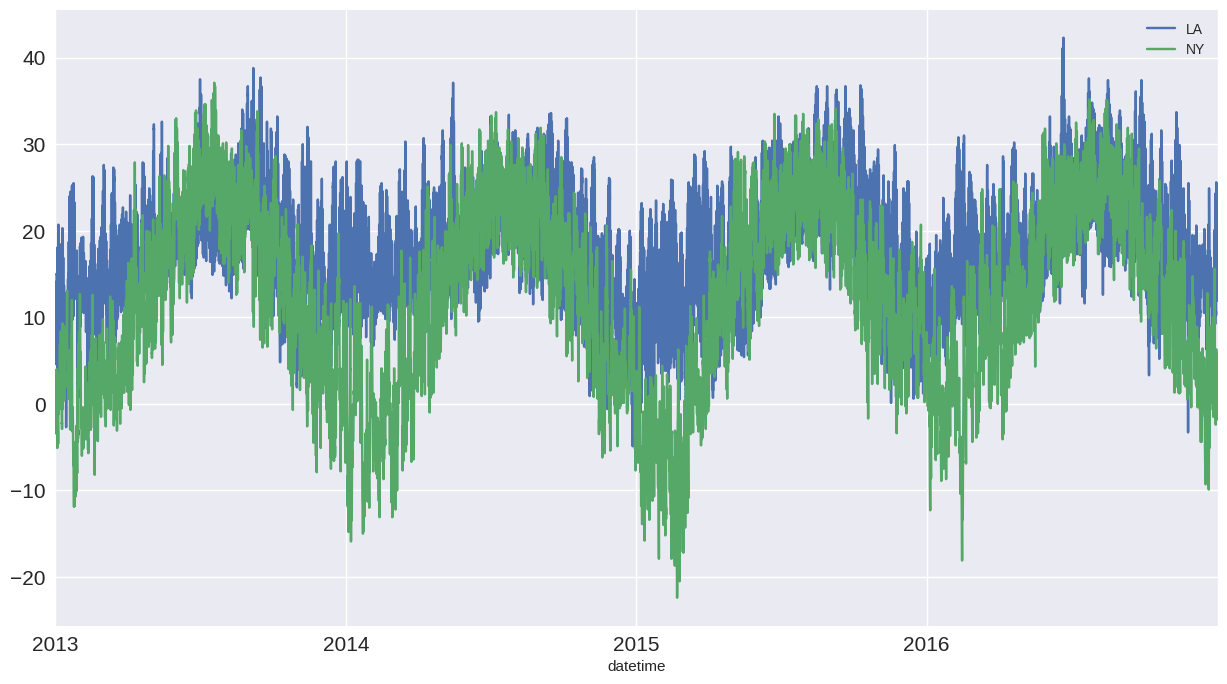

In [ ]:
temp.plot(figsize = (15, 8), fontsize = 15)
plt.show()

In [ ]:
temp_m.to_timestamp(how = "start").to_period()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


### Advanced Indexing with reindex()

In [ ]:
import pandas as pd

In [ ]:
# temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")

path = '/content/drive/MyDrive/Colab/Datasets/time_series_sample.csv'
temp = pd.read_csv(path, parse_dates=["datetime"], index_col= "datetime")

In [ ]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [ ]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [ ]:
temp_d = temp.resample("D").mean()
temp_d

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667
...,...,...
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500


In [ ]:
birthd = pd.date_range(end = "2018-12-24", periods = 10,  freq = pd.DateOffset(years = 1))
birthd

DatetimeIndex(['2009-12-24', '2010-12-24', '2011-12-24', '2012-12-24',
               '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-24',
               '2017-12-24', '2018-12-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [ ]:
#temp_d.loc[birthd]

In [ ]:
temp_d.reindex(birthd)

,LA,NY
2009-12-24,NaN,NaN
2010-12-24,NaN,NaN
2011-12-24,NaN,NaN
2012-12-24,NaN,NaN
2013-12-24,16.158333,3.487500
2014-12-24,10.712500,8.045833
2015-12-24,10.716667,17.462500
2016-12-24,11.820833,4.045833
2017-12-24,NaN,NaN
2018-12-24,NaN,NaN


In [ ]:
temp_d.head()

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667


In [ ]:
temp_d.tail()

,LA,NY
datetime,,
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500
2016-12-30,15.933333,2.204167
2016-12-31,13.275000,1.204167
